# Data Analytics Project - Backtesting Model Predictions

# BAJAJ-AUTO STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of Bajaj

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair1/Pair1_orders.csv')
orders_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-05,3145.399902,2772.300049,373.099854,1.220189,FLAT
2,2018-09-06,3164.850098,2783.100098,381.750000,1.330864,FLAT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT


In [3]:
orders_df.tail()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
54,2018-11-27,2958.149902,2599.649902,358.500000,1.033390,FLAT
55,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT
56,2018-11-29,3016.800049,2724.000000,292.800049,0.192787,FLAT
57,2018-11-30,3055.199951,2745.699951,309.500000,0.406456,FLAT
58,2018-12-03,3039.899902,2736.000000,303.899902,0.334805,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

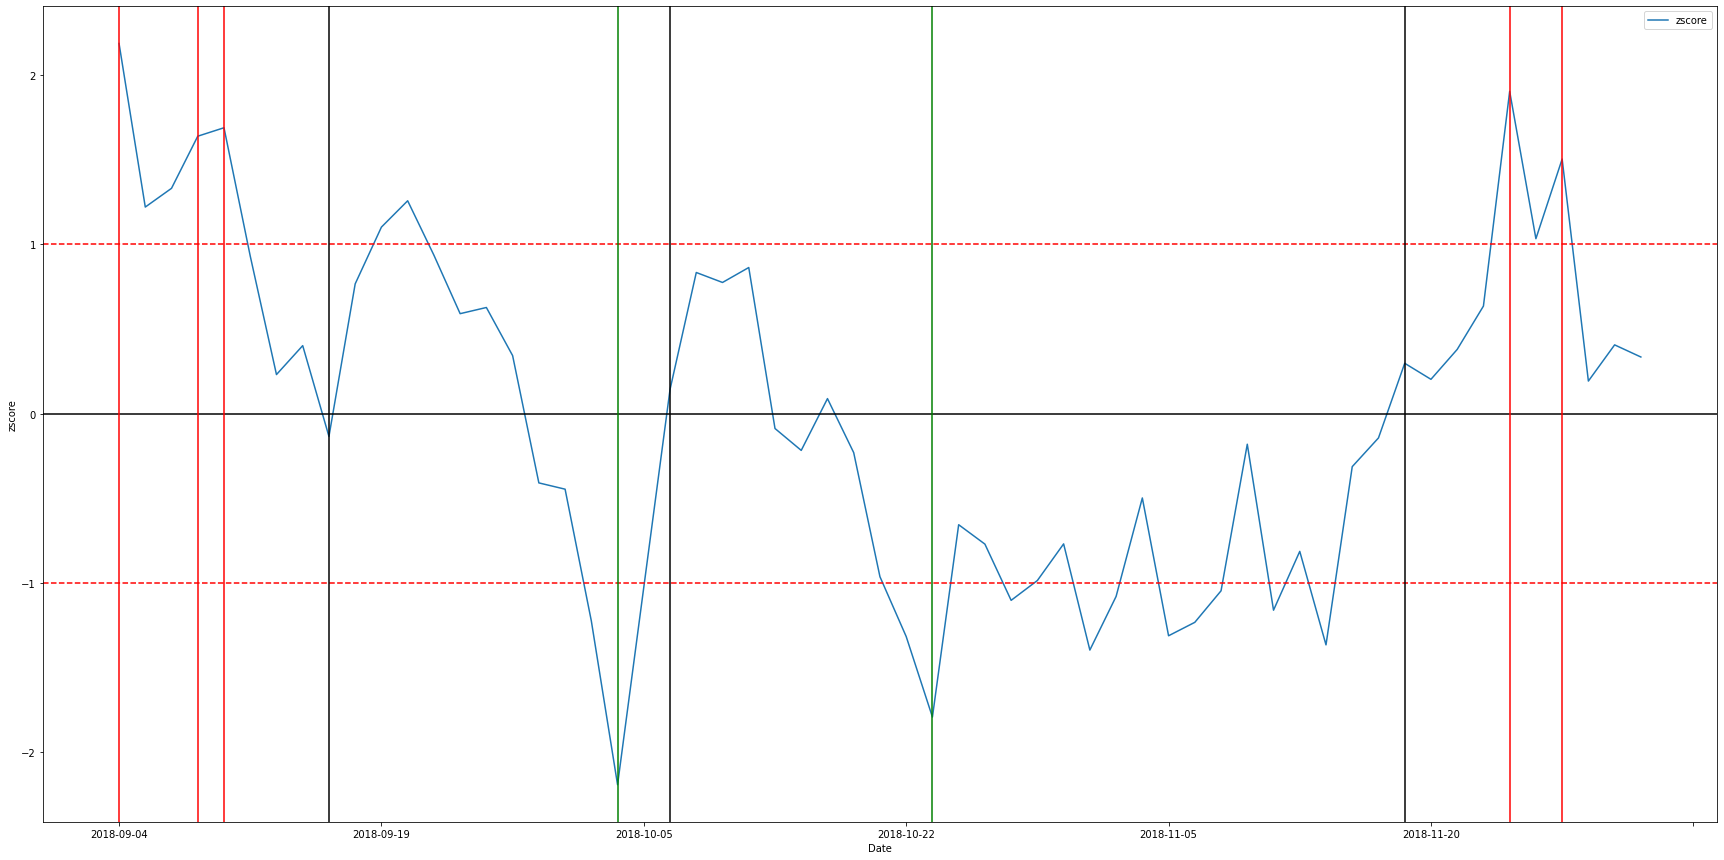

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of BAJAJ-AUTO

In [5]:
predictions = pd.read_csv("../Models/Pair1/Bajaj_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-09-04,2735.550049,2828.063046,2758.982897,NaN
1,2018-09-05,2772.300049,2827.527597,2758.487833,NaN
2,2018-09-06,2783.100098,2826.992147,2753.048689,NaN
3,2018-09-07,2923.550049,2826.456697,2750.827712,NaN
4,2018-09-10,2868.600098,2824.743246,2751.573240,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2018-09-19,2790.100098,2819.817096,2606.546429,2865.9644
11,2018-09-21,2799.199951,2818.746197,2599.792268,2863.8057
12,2018-09-24,2759.300049,2817.032746,2613.430205,2859.3340
13,2018-09-25,2788.699951,2816.497296,2634.041553,2850.9849
14,2018-09-26,2773.300049,2815.961846,2629.201823,2838.6760


## 2.4 Visualize the predictions by different models

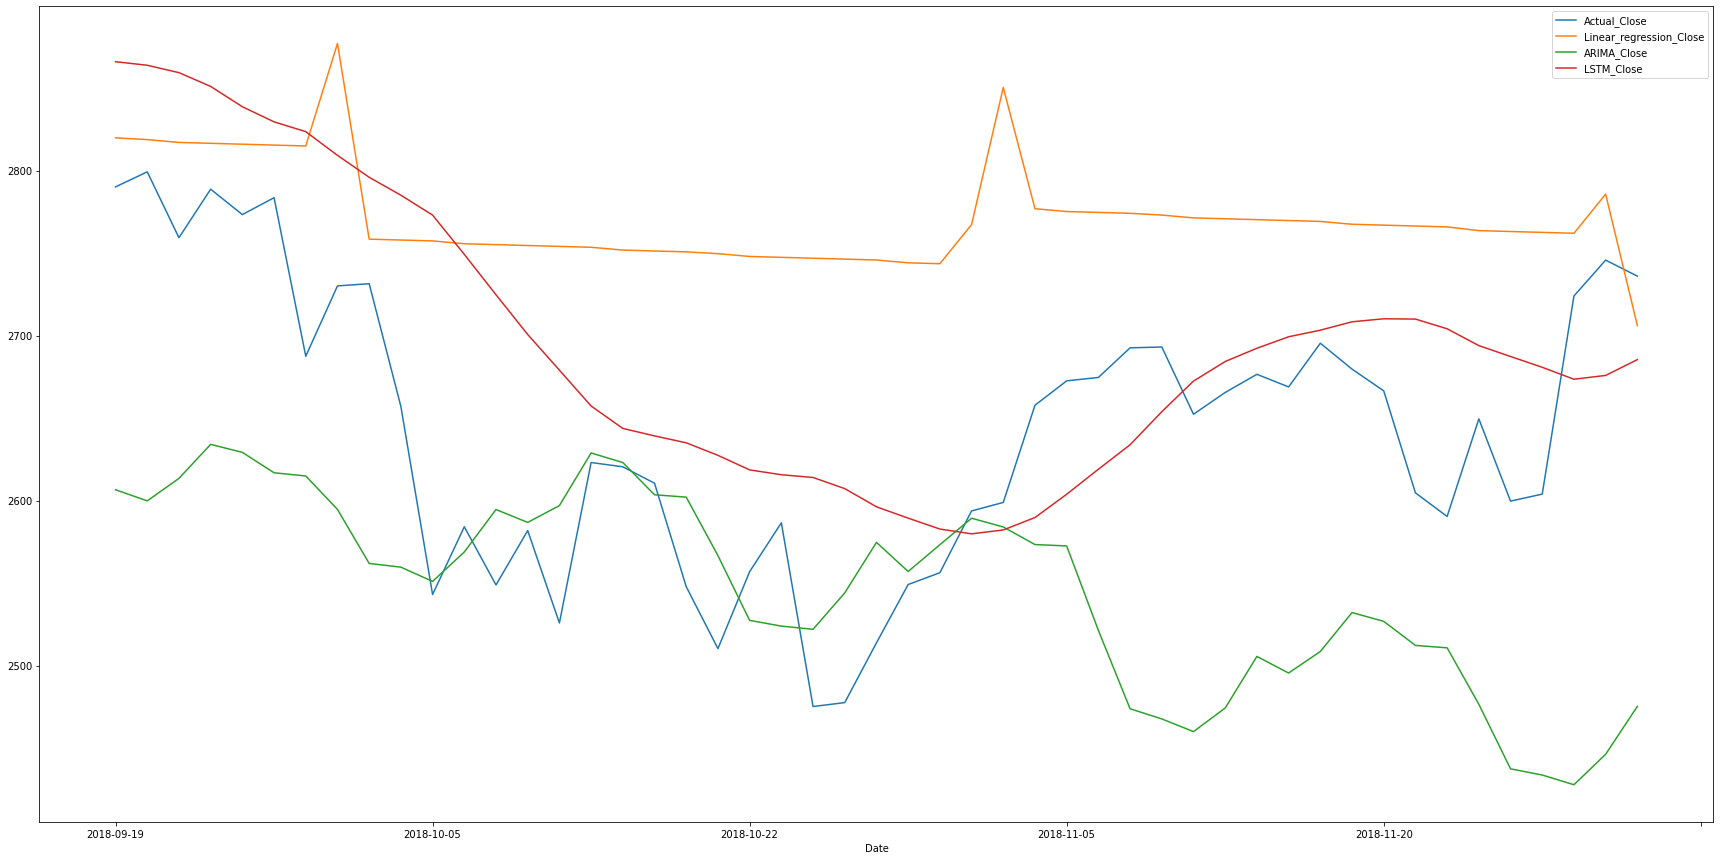

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
8,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
19,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
21,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
31,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
49,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
53,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT
55,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
2,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT
3,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
4,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,LONG
5,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
6,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,LONG
7,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
8,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,SHORT
9,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,LONG
1,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,LONG
2,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,LONG
3,2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
4,2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,SHORT
5,2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
6,2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,SHORT
7,2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
8,2018-11-26,3076.000000,2649.500000,426.500000,1.903422,LONG
9,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,LONG


- As Bajaj is the stock with the lower price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
Date,,,,,
2018-09-04,3184.149902,2735.550049,448.599854,2.186180,LONG
2018-09-07,3329.350098,2923.550049,405.800049,1.638574,LONG
2018-09-10,3278.300049,2868.600098,409.699951,1.688472,LONG
2018-09-17,3127.899902,2860.649902,267.250000,-0.134115,GET_OUT_OF_POSITION
2018-10-04,2763.500000,2657.000000,106.500000,-2.190844,SHORT
2018-10-08,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
2018-10-23,2724.250000,2586.500000,137.750000,-1.791013,SHORT
2018-11-19,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
2018-11-26,3076.000000,2649.500000,426.500000,1.903422,LONG


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2018-09-19,2790.100098,2819.817096,2606.546429,2865.9644
2018-09-21,2799.199951,2818.746197,2599.792268,2863.8057
2018-09-24,2759.300049,2817.032746,2613.430205,2859.3340
2018-09-25,2788.699951,2816.497296,2634.041553,2850.9849
2018-09-26,2773.300049,2815.961846,2629.201823,2838.6760
2018-09-27,2783.550049,2815.426397,2616.829720,2829.5044
2018-09-28,2687.449951,2814.890947,2614.883766,2823.5803
2018-10-01,2730.100098,2877.017643,2594.627337,2809.2017
2018-10-03,2731.399902,2758.420879,2561.871766,2795.9124


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
Date,,,,,,,,,
2018-10-04,2657.000000,2757.885429,2559.631346,2785.0454,2763.500000,2657.000000,106.500000,-2.190844,SHORT
2018-10-08,2584.100098,2755.636528,2568.814705,2749.2036,2873.050049,2584.100098,288.949951,0.143527,GET_OUT_OF_POSITION
2018-10-23,2586.500000,2747.390578,2523.896360,2615.6430,2724.250000,2586.500000,137.750000,-1.791013,SHORT
2018-11-19,2679.649902,2767.443564,2532.103874,2708.3262,2980.649902,2679.649902,301.000000,0.297702,GET_OUT_OF_POSITION
2018-11-26,2649.500000,2763.588314,2476.527235,2693.8933,3076.000000,2649.500000,426.500000,1.903422,LONG
2018-11-28,2603.899902,2762.517415,2433.639972,2680.7476,2999.149902,2603.899902,395.250000,1.503591,LONG


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['HEROMOTOCO_Close', 'BAJAJ-AUTO_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-10-04,2657.000000,2757.885429,2559.631346,2785.0454,SHORT
2018-10-08,2584.100098,2755.636528,2568.814705,2749.2036,GET_OUT_OF_POSITION
2018-10-23,2586.500000,2747.390578,2523.896360,2615.6430,SHORT
2018-11-19,2679.649902,2767.443564,2532.103874,2708.3262,GET_OUT_OF_POSITION
2018-11-26,2649.500000,2763.588314,2476.527235,2693.8933,LONG
2018-11-28,2603.899902,2762.517415,2433.639972,2680.7476,LONG


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 2657.0 2757.885428956361 2559.63134625668 2785.0454 SHORT
number of shares:  7.0
actual profit:  510.29931640625
LR profit:  15.742308083109947
ARIMA profit:  -64.28350943657051
LSTM profit:  250.89260000000104


ORDER:  1 2584.10009765625 2755.636527801631 2568.8147047476186 2749.2036 GET_OUT_OF_POSITION


ORDER:  2 2586.5 2747.3905778767075 2523.896359543673 2615.643 SHORT
number of shares:  7.0
actual profit:  -652.04931640625
LR profit:  -140.37090560084062
ARIMA profit:  -57.4525987404495
LSTM profit:  -648.7823999999996


ORDER:  3 2679.64990234375 2767.4435643911133 2532.1038736494515 2708.3262 GET_OUT_OF_POSITION


ORDER:  4 2649.5 2763.588314258377 2476.5272349015513 2693.8933 LONG
number of shares:  7.0
actual profit:  -319.20068359375
LR profit:  -7.496295230702344
ARIMA profit:  -300.2108394618981
LSTM profit:  -92.01990000000023



In [19]:
actual_profits

[510.29931640625, 0, -652.04931640625, 0, -319.20068359375, 0]

In [20]:
LR_profits

[15.742308083109947, 0, -140.37090560084062, 0, -7.496295230702344, 0]

In [21]:
LSTM_profits

[250.89260000000104, 0, -648.7823999999996, 0, -92.01990000000023, 0]

In [22]:
shares

[7.0, 0, 7.0, 0, 7.0, 0]

In [23]:
ARIMA_profits

[-64.28350943657051, 0, -57.4525987404495, 0, -300.2108394618981, 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-10-04,2657.000000,2757.885429,2559.631346,2785.0454,SHORT
2018-10-08,2584.100098,2755.636528,2568.814705,2749.2036,GET_OUT_OF_POSITION
2018-10-23,2586.500000,2747.390578,2523.896360,2615.6430,SHORT
2018-11-19,2679.649902,2767.443564,2532.103874,2708.3262,GET_OUT_OF_POSITION
2018-11-26,2649.500000,2763.588314,2476.527235,2693.8933,LONG
2018-11-28,2603.899902,2762.517415,2433.639972,2680.7476,LONG


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2018-10-04,2657.000000,2757.885429,2559.631346,2785.0454,SHORT,7.0,510.299316,15.742308,-64.283509,250.8926
2018-10-08,2584.100098,2755.636528,2568.814705,2749.2036,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
2018-10-23,2586.500000,2747.390578,2523.896360,2615.6430,SHORT,7.0,-652.049316,-140.370906,-57.452599,-648.7824
2018-11-19,2679.649902,2767.443564,2532.103874,2708.3262,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
2018-11-26,2649.500000,2763.588314,2476.527235,2693.8933,LONG,7.0,-319.200684,-7.496295,-300.210839,-92.0199
2018-11-28,2603.899902,2762.517415,2433.639972,2680.7476,LONG,0.0,0.000000,0.000000,0.000000,0.0000


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2018-10-04,2657.000000,2757.885429,2559.631346,2785.0454,SHORT,7.0,510.299316,15.742308,-64.283509,250.8926
1,2018-10-08,2584.100098,2755.636528,2568.814705,2749.2036,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
2,2018-10-23,2586.500000,2747.390578,2523.896360,2615.6430,SHORT,7.0,-652.049316,-140.370906,-57.452599,-648.7824
3,2018-11-19,2679.649902,2767.443564,2532.103874,2708.3262,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.0000
4,2018-11-26,2649.500000,2763.588314,2476.527235,2693.8933,LONG,7.0,-319.200684,-7.496295,-300.210839,-92.0199
5,2018-11-28,2603.899902,2762.517415,2433.639972,2680.7476,LONG,0.0,0.000000,0.000000,0.000000,0.0000


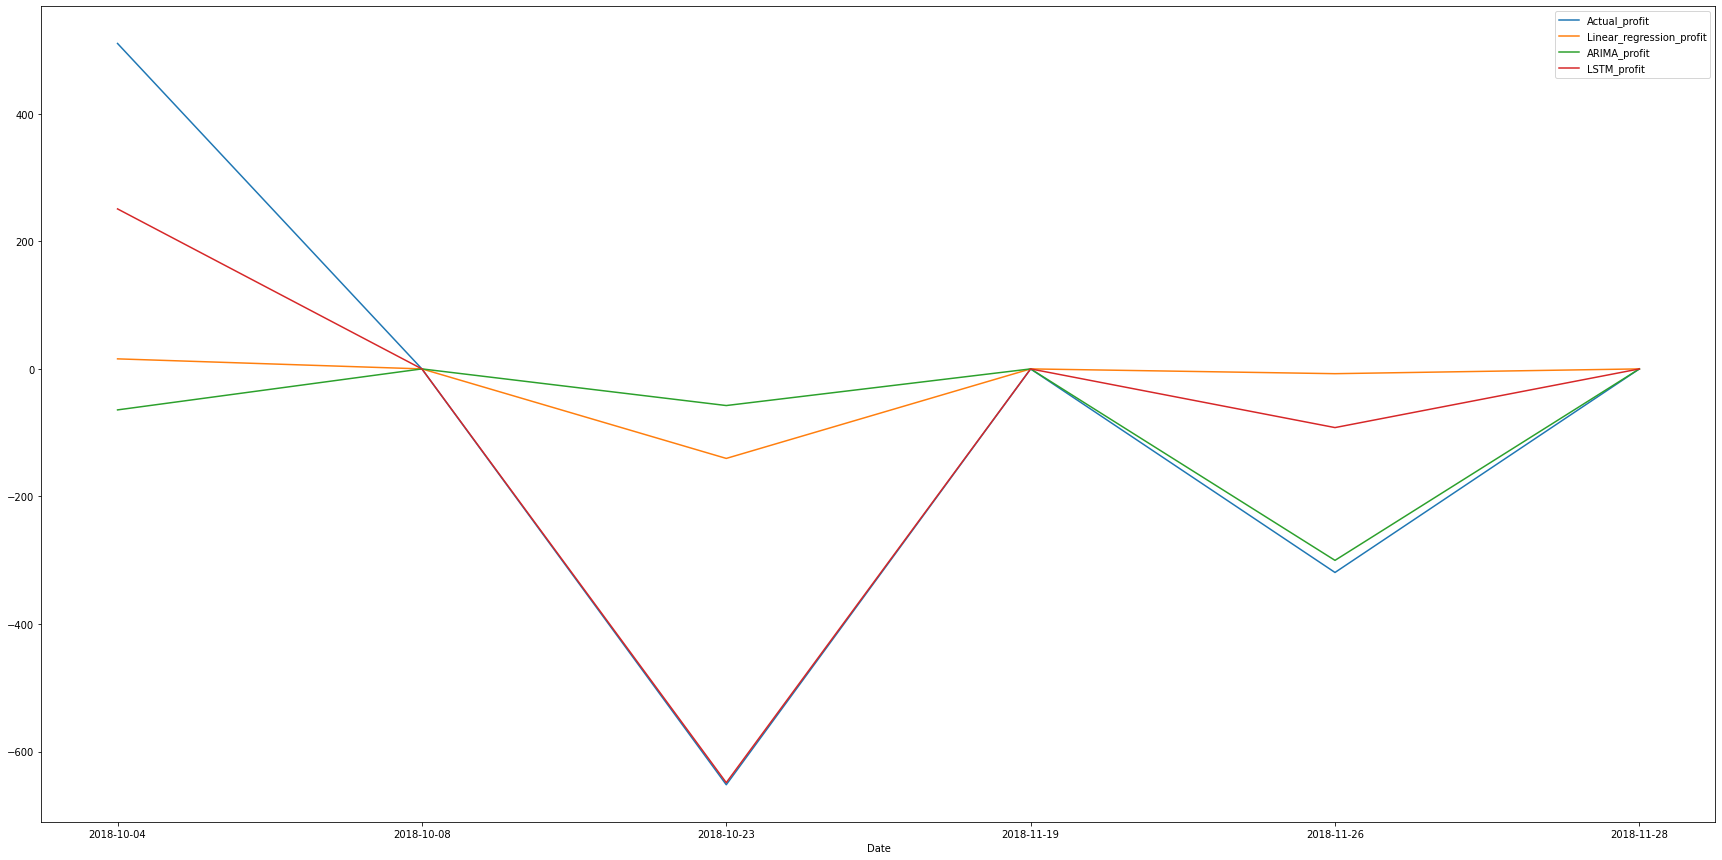

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---